Goal: run some preliminary data analysis on whether we have a chance of some categorical variables predicting degradation

In [1]:
#import pandas, sklearn, numpy, etc
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [241]:
#get the data

uncleaned = pd.read_csv("fleet_results_public.csv")
uncleaned.sample(20)

,plr_type,plr_median,plr_confidence_low,plr_confidence_high,length_years_rounded,power_dc,pv_climate_zone,technology1,technology2,type_mounting,tracking
2486,clearsky,-0.23,-1.96,0.97,3,> 2 MW,T3,mono-Si,Al-BSF,Ground,False
4171,sensor,-0.84,-1.37,-0.43,3,0.5-2 MW,T3,mono-Si,PERC,Parking,False
50,sensor,-0.51,-1.05,-0.01,3,< 0.5 MW,T3,mono-Si,PERC,Parking,False
1405,sensor,-2.34,-2.84,-2.01,4,< 0.5 MW,T4,Unknown,Unknown,Roof,False
275,sensor,-0.65,-0.82,-0.50,>4,> 2 MW,T4,CdTe,CdTe,Ground,False
1002,nsrdb,-1.77,-2.69,-0.41,2,0.5-2 MW,T4,mono-Si,n-IBC,Canopy,False
2234,sensor,-1.25,-1.57,-0.95,10,< 0.5 MW,T5,multi-Si,Al-BSF,Roof,False
3338,sensor,-0.80,-1.03,-0.60,5,< 0.5 MW,T5,multi-Si,Al-BSF,Parking,False
1128,sensor,-0.47,-0.74,-0.10,4,0.5-2 MW,T4,mono-Si,Al-BSF,Parking,False
385,sensor,-2.46,-3.41,-1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
#make a copy to edit
clean = uncleaned.copy()
#should remove rows were we don't have climate zone, tech1, tech 2
clean=clean.drop(clean.loc[pd.isnull(clean["pv_climate_zone"])].index)
clean=clean.drop(clean.loc[pd.isnull(clean["technology1"])].index)
clean=clean.drop(clean.loc[pd.isnull(clean["technology2"])].index)
clean=clean.drop(clean.loc[(clean["technology1"]=="Unknown") | 
                           (clean["technology1"]=="c-Si") |
                           (clean["technology1"]=="CIGS") |
                           (clean["technology2"]=="n-PERT")].index)
clean=clean.drop(clean.loc[clean["pv_climate_zone"]=="T2"].index)



clean


,plr_type,plr_median,plr_confidence_low,plr_confidence_high,length_years_rounded,power_dc,pv_climate_zone,technology1,technology2,type_mounting,tracking
0,sensor,-1.00,-1.48,-0.62,3,< 0.5 MW,T3,mono-Si,PERC,Parking,False
1,sensor,-0.55,-0.79,-0.22,3,< 0.5 MW,T3,mono-Si,PERC,Parking,False
2,sensor,-1.44,-1.89,-1.03,3,< 0.5 MW,T3,mono-Si,PERC,Parking,False
3,sensor,-0.50,-0.86,-0.20,3,< 0.5 MW,T3,mono-Si,PERC,Parking,False
4,sensor,-0.52,-0.86,-0.17,3,< 0.5 MW,T3,mono-Si,PERC,Parking,False
...,...,...,...,...,...,...,...,...,...,...,...
4910,nsrdb,-0.97,-1.60,-0.46,8,< 0.5 MW,T4,multi-Si,Al-BSF,Roof,False
4911,nsrdb,-1.29,-1.81,-0.66,9,< 0.5 MW,T4,multi-Si,Al-BSF,Roof,False
4912,sensor,-0.48,-1.04,0.12,4,0.5-2 MW,T3,multi-Si,Al-BSF,Roof,False
4913,sensor,-0.09,-0.27,0.04,6,< 0.5 MW,T6,multi-Si,Al-BSF,Parking,False


In [243]:
#split into test and train
from sklearn.model_selection import train_test_split
features = ["power_dc","pv_climate_zone","technology1","technology2","type_mounting","tracking"]
#note that we will have to do technology1 OR technology2 since the latter is a refinement of the former

X_train, X_test, y_train, y_test = train_test_split(clean[features],clean["plr_median"], train_size=0.8)


Goal: Given some categorical features, we want to get a CONTINUOUS output.
First, we will do some plots just to suss out any weirdness

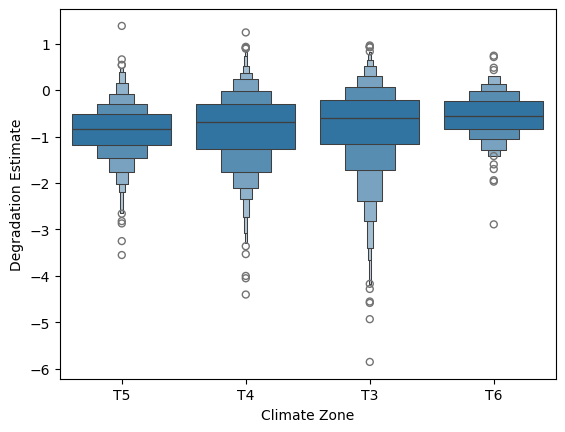

In [257]:
#make some plots!

#plot 1: climate zone vs. plr_median
sns.boxenplot(x=X_train["pv_climate_zone"], y=y_train)

#sns.swarmplot(x=X_train["pv_climate_zone"], y=y_train)
plt.xlabel("Climate Zone")
plt.ylabel("Degradation Estimate")
plt.show()

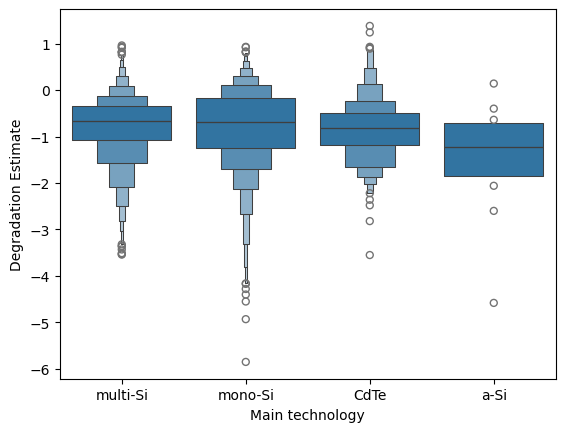

In [258]:
#plot 2: technology1 vs. plr_median
sns.boxenplot(x=X_train["technology1"],y=y_train)
plt.xlabel("Main technology")
plt.ylabel("Degradation Estimate")
plt.show()

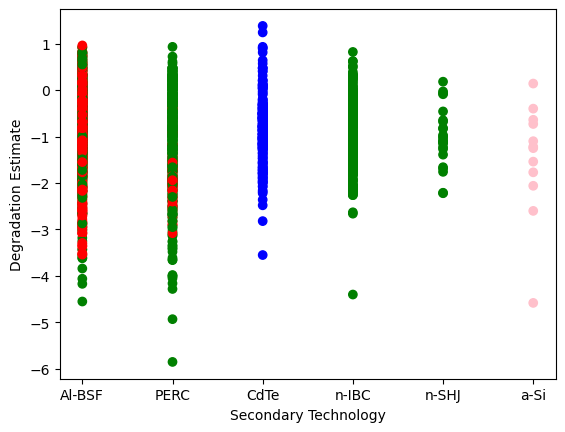

In [ ]:
#technology 2 vs. plr_median

#I want to color them by main technology
colors = {"multi-Si":"r", "mono-Si":"g", "CdTe":"b", "a-Si":"pink", "CIGS":"orange", "c-Si":"y"}

plt.scatter(X_train["technology2"],y_train, c=X_train["technology1"].map(colors))
plt.xlabel("Secondary Technology")
plt.ylabel("Degradation Estimate")
plt.show()

In [247]:
#there seem to be very few c-Si, n-PERT, CIGS --> remove 

#there seem to be very few T2 measurements --> remove

#will do this earlier in the code 

Time to do the analysis! 
First one-hot encode everything.

For each categorical variable, leave out one of the options to avoid collinearity issues

In [248]:
#ONE-HOT ENCODE

climates = ["T3","T4","T5"] #missing T6
tech1 = ["mono-Si","multi-Si","CdTe"] #missing a-Si

#climate zone: encode T3,T4, T5. Leave out T6.
X_train[["T3","T4","T5"]] = pd.get_dummies(X_train["pv_climate_zone"])[["T3","T4","T5"]]

#Main technology: encode mono-Si, multi-Si, CdTe. Leave out a-Si
X_train[["mono-Si","multi-Si","CdTe"]] = pd.get_dummies(X_train["technology1"])[["mono-Si","multi-Si","CdTe"]]



X_train

,power_dc,pv_climate_zone,technology1,technology2,type_mounting,tracking,T3,T4,T5,mono-Si,multi-Si,CdTe
1493,< 0.5 MW,T5,multi-Si,Al-BSF,Parking,False,False,False,True,False,True,False
1706,> 2 MW,T4,mono-Si,PERC,Parking,False,False,True,False,True,False,False
2957,0.5-2 MW,T3,CdTe,CdTe,Ground,False,True,False,False,False,False,True
2300,< 0.5 MW,T4,mono-Si,PERC,Parking,False,False,True,False,True,False,False
2714,> 2 MW,T4,multi-Si,Al-BSF,Ground,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1234,< 0.5 MW,T4,mono-Si,n-IBC,Canopy,False,False,True,False,True,False,False
232,> 2 MW,T3,multi-Si,Al-BSF,Ground,False,True,False,False,False,True,False
3487,> 2 MW,T5,CdTe,CdTe,Ground,False,False,False,True,False,False,True
4446,> 2 MW,T4,CdTe,CdTe,Ground,True,False,True,False,False,False,True


In [249]:
#will we need cross terms?
for i in climates:
    for j in tech1:
        X_train[i+j]=X_train[i]*X_train[j]

X_train


,power_dc,pv_climate_zone,technology1,technology2,type_mounting,tracking,T3,T4,T5,mono-Si,...,CdTe,T3mono-Si,T3multi-Si,T3CdTe,T4mono-Si,T4multi-Si,T4CdTe,T5mono-Si,T5multi-Si,T5CdTe
1493,< 0.5 MW,T5,multi-Si,Al-BSF,Parking,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1706,> 2 MW,T4,mono-Si,PERC,Parking,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
2957,0.5-2 MW,T3,CdTe,CdTe,Ground,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,False
2300,< 0.5 MW,T4,mono-Si,PERC,Parking,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
2714,> 2 MW,T4,multi-Si,Al-BSF,Ground,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,< 0.5 MW,T4,mono-Si,n-IBC,Canopy,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
232,> 2 MW,T3,multi-Si,Al-BSF,Ground,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3487,> 2 MW,T5,CdTe,CdTe,Ground,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
4446,> 2 MW,T4,CdTe,CdTe,Ground,True,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False


In [250]:
#cross-term column names
crossterm = []
for i in climates:
    for j in tech1:
        crossterm.append(i+j)

In [251]:
#import
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

#k fold object
kfold = KFold(n_splits = 5, shuffle=True)

In [252]:
#which split. Helps keep track of which location in RMSE array we'll be putting everything in
i=0
#keep track of errors. #models x # folds
rmses = np.zeros((2,5))

#iterate through folds
for train_index, test_index in kfold.split(X_train):
    #define training and holdout for this fold
    X_train_tt = X_train.iloc[train_index]
    X_train_ho = X_train.iloc[test_index]
    y_train_tt = y_train.iloc[train_index]
    y_train_ho = y_train.iloc[test_index]

    #model 1: one-hot encode, one fewer variables per category, no cross-terms
    slr1 = LinearRegression()
    slr1.fit(X_train_tt[climates+tech1],y_train_tt)
    y_pred1 = slr1.predict(X_train_ho[climates+tech1])
    rmses[0,i]=root_mean_squared_error(y_train_ho, y_pred1)

    #model2: with cross-terms
    crossLR = LinearRegression()
    crossLR.fit(X_train_tt[climates+tech1+crossterm],y_train_tt)
    y_pred2 = crossLR.predict(X_train_ho[climates+tech1+crossterm])
    rmses[1,i]=root_mean_squared_error(y_train_ho, y_pred2)


    i+=1


for i in range(len(rmses)):
    print(f"Average RMSE = {rmses[i].mean()}")


Average RMSE = 0.777243599930661
Average RMSE = 0.7660167593076359


In [2]:
systems = pd.read_csv("systems_20250729.csv")
systems

,system_id,system_public_name,site_location,timezone_or_utc_offset,latitude,longitude,elevation_m,dc_capacity_kW,kg_climate,pvcz_composite,...,azimuth,tilt,first_timestamp,last_timestamp,years,number_records,dataset_size_mb,available_sensor_channels,qa_status,qa_issue
0,2,Residential 1a,"Lakewood, CO",America/Denver,39.72140,-105.09720,1675.000000,2.912,Dfb,12,...,181.2,18.5,1/21/2010 11:02,1/13/2020 16:45,9.9835,13685898.0,313.25,7,fail,less than 1.0 years data
1,3,Residential 1b,"Lakewood, CO",America/Denver,39.72140,-105.09720,1675.000000,2.720,Dfb,12,...,181.2,18.5,1/21/2010 11:02,1/30/2017 17:00,7.0301,12668178.0,289.95,7,fail,NaN
2,4,NREL x-Si -1,"Golden, CO",7,39.74060,-105.17740,1795.300000,1.000,BSk,12,...,180.0,40.0,8/26/2007 0:00,7/28/2025 22:10,17.9342,113978017.0,2608.75,15,pass,"Filtered time series less than 1.0 years data,..."
3,10,NREL CIS -1,"Golden, CO",7,39.74040,-105.17740,1792.800000,1.120,BSk,12,...,180.0,40.0,1/9/2006 22:45,7/29/2025 0:00,19.5643,113103574.0,2588.74,14,pass,Filtered time series less than 1.0 years data
4,33,Silicor Materials,"Golden, CO",7,39.74040,-105.17720,1794.000000,2.400,BSk,12,...,180.0,40.0,3/11/2010 16:23,7/28/2025 22:10,15.3917,113673602.0,2601.78,15,pass,"Percent clipping exceeded threshold of 10%, Fi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,14760,PVDB_TADHC1036224,NaN,America/Los_Angeles,33.71677,-117.90680,16.204149,NaN,NaN,33,...,NaN,NaN,4/24/2015 20:35,6/16/2017 1:35,2.1479,5179501.0,118.55,40,fail,NaN
1858,14761,PVDB_TADHC1036570,NaN,America/Los_Angeles,33.77269,-117.80076,83.785385,NaN,NaN,34,...,NaN,NaN,4/9/2015 17:25,6/20/2019 23:50,4.2000,10565144.0,241.82,20,fail,NaN
1859,14762,PVDB_TADKC1017785,NaN,America/Los_Angeles,33.75678,-117.84557,49.351692,NaN,NaN,34,...,NaN,NaN,1/9/2015 0:00,1/20/2019 1:20,4.0328,4303616.0,98.50,11,fail,NaN
1860,14763,PVDB_TADKC1018154,NaN,America/Los_Angeles,33.73392,-117.89290,20.376822,NaN,NaN,34,...,NaN,NaN,6/2/2015 22:35,5/21/2019 13:35,3.9698,9738246.0,222.89,20,fail,NaN


In [9]:
systems_cleaned = pd.read_csv("data/core/systems_cleaned.csv")
systems_cleaned["has_irrad_data"].value_counts()
systems_cleaned.columns

Index(['system_id', 'system_public_name', 'site_location',
       'timezone_or_utc_offset', 'latitude', 'longitude', 'elevation_m',
       'dc_capacity_kW', 'kg_climate', 'pvcz_composite', 'pvcz_t_rack',
       'pvcz_t_roof', 'pvcz_humidity', 'pvcz_wind', 'tracking', 'type',
       'azimuth', 'tilt', 'first_timestamp', 'last_timestamp', 'years',
       'number_records', 'dataset_size_mb', 'available_sensor_channels',
       'qa_status', 'qa_issue', 'first_year', 'is_prize_data',
       'is_lake_parquet_data', 'is_lake_csv_data', 'has_irrad_data'],
      dtype='str')